### Project name
- O que se vai fazer neste projeto
- Tipo de model (imbalance binary model)
- Explicar o pipeline da solução baseado em CRISP-DM framework
    1. Business underentanding
    2. Data understanding
    3. Modeling
    5. Validation
    6. Deployment
- Introduzir a informação e os beneficios da solução

### 1.0 Importar livrarias

In [73]:
# Data manupulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# pisplay options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
%matplotlib inline

# Filter warnings.
# import warnings
# warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

### 1.1 Entendimento de data

In [2]:
# URL do conjunto de dados Titanic
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Importando o conjunto de dados
df = pd.read_csv(url)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 1.2 Dicionario de dados
- Detalhamos a informação que contem cada feature

**PassengerId:** Identificador único para cada passageiro.

**Survived:** Indicador de sobrevivência (0 = não sobreviveu, 1 = sobreviveu).

**Pclass:** Classe do ticket (1 = Primeira, 2 = Segunda, 3 = Terceira).

**Name:** Nome do passageiro, inclui títulos como Sr., Sra.

**Sex:** Sexo do passageiro (male = masculino, female = feminino).

**Age:** Idade do passageiro, pode conter valores ausentes.

**SibSp:** Número de irmãos/cônjuges a bordo.

**Parch:** Número de pais/filhos a bordo.

**Ticket:** Número do ticket do passageiro.

**Fare:** Tarifa paga pelo ticket.

**Cabin:** Número da cabine, muitos valores ausentes.

**Embarked:** Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

### 1.3 Informação geral
- Entraremos a informações generais da data como as dimensões, tipo de datos, dados nulos, e duplicados, para detectar posiveis problemas que exigirão limpeza de dados e coletar mais informações sobre os dados que estamos lidando

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   PassengerId  int64  
 1   Survived     int64  
 2   Pclass       int64  
 3   Name         object 
 4   Sex          object 
 5   Age          float64
 6   SibSp        int64  
 7   Parch        int64  
 8   Ticket       object 
 9   Fare         float64
 10  Cabin        object 
 11  Embarked     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
print('-'*20, 'General information data of the data frame', '-'*20, '\n')
print('Number of rows = {}'.format(df.shape[0]))
print('Number of columns = {}'.format(df.shape[1]),'\n')
print('head of columns = {}'.format(df.columns.values))

-------------------- General information data of the data frame -------------------- 

Number of rows = 891
Number of columns = 12 

head of columns = ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


- **Observamos que temos variaveis que podem ser excluidas**, as variaveis tem valores unicos por instancia como los Id's dos passageiros
- Algumas variaveis tem **data types incorretos**, precisaremos corregir os datatypes de algumas variaveis como Age

### 1.4 Missing e Duplicados

In [17]:
missing_df = df.isna().sum().to_frame().rename(columns={0: 'count'}).sort_values(by=['count'], ascending=False)
missing_df['pct'] = round(missing_df['count'] / df.shape[0] * 100, 3)
missing_df

,count,pct
Cabin,687,77.104
Age,177,19.865
Embarked,2,0.224
PassengerId,0,0.000
Name,0,0.000
Pclass,0,0.000
Survived,0,0.000
Sex,0,0.000
Parch,0,0.000
SibSp,0,0.000


In [11]:
df.duplicated().sum()

0

- Não temos registros duplicados
- Não temos variaveis com o 100% de registros nulos
- Estableceremos um corte para as variaveis de mas de 70% de nulos
- Para as **variaveis restante investigaremos os valores nulos e descidiremos de vão ficar ou ser removidas**
- **Se os valores nulos não são randomicos**, quer dizer que os valores nulos pertecem a uma determinada classe, então pode ficar e considerar como uma classe.
- Em caso que os valores nulos sejam randomicos, podemos fazer:
    - **Remover os registros**, em caso que tenhamos uma cantidad de registros grande e os registros com nulo sejam poucos.
    - **Excluir a vairavel**, quando se tem um numero excesivo de valores nulos
    - **Manter os valores nulos** como uma categoria, recomendavel "unknown". Este tenfra um pesso no score final
    - **Imputar um valor**, Podemos utilizar a mean, median, mode ou inferir os valores com outra variavel que não tenha valores nulos e que estejam altamente correlacionada.
- Investigaremos os valores nulos e variaveis relevantes na sequencia

In [12]:
# Observando toda a distribuição de dados Survived para comparar com as distribuições de valores ausentes desta variável alvo
df['Survived'].value_counts(normalize=True) * 100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [19]:
# Investigate missing values in Embarked.
df.loc[df['Embarked'].isna()].sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


In [24]:
# Investigate missing values in Age.
df.loc[df['Age'].isna()].sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
87,88,0,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.0500,NaN,S
596,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.0000,NaN,S


In [22]:
# Avaliar se a distribuição dos valores ausentes Age em Survived para ver se sua ocorrência é aleatória.
df.loc[df['Age'].isna(),['Survived']].value_counts(normalize=True)

Survived
0           0.706215
1           0.293785
Name: proportion, dtype: float64

In [25]:
# Investigate missing values in Age.
df.loc[df['Cabin'].isna()].sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q


In [28]:
# Avaliar se a distribuição dos valores ausentes Age em Survived para ver se sua ocorrência é aleatória.
df.loc[df['Cabin'].isna(),['Survived']].value_counts(normalize=True)

Survived
0           0.700146
1           0.299854
Name: proportion, dtype: float64

- **Será removido os registros que contem nulo na variavel Embarked**, porque representa ( 2 registros, aproximadamente um 0.22% dos dados)
- Para as **variaveis Age** analizamos que elas uma distribuição de registros nulos não randomica (70% para não sobrevivente e 30% para sobrevivente), **porem vamos criar uma outra categoria para essas variaveis**
- Cabin sera removido por conter mais de 70% de registros nulos
- Todos estes procedimentos descritos serão realizados no topico de data clenning

### 1.5 Features Numericas e Categoricas 

- Vou verificar quais variáveis ​​numéricas e categóricas estão nos dados. Isso me ajuda a separá-los e verificar quantas categorias diferentes existem nos recursos categóricos. O número de categorias é importante porque afeta a forma como codificamos os dados. Se houver muitas categorias, o uso da codificação one-hot pode tornar a dimensionalidade dos dados muito grande. Isto pode ser um problema. Além disso, verei se uma variável é útil ou não. Às vezes, as variáveis ​​têm muitas categorias e não ajudam muito o modelo. Nesse caso, talvez seja necessário removê-los da análise.

In [29]:
# Cerificar quais variaveis são categoricas e numericas
numerical_features = df.select_dtypes('number').columns.tolist()
categorical_features = df.select_dtypes('object').columns.tolist()
print(f'There are {len(numerical_features)} numerical variables in the data. They are: {numerical_features}.')
print(f'There are {len(categorical_features)} categorical variables in the data. They are: {categorical_features}.')

There are 7 numerical variables in the data. They are: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'].
There are 5 categorical variables in the data. They are: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'].


In [30]:
# Avaliando a cardinalidade das features categoricas
for feature in categorical_features:
    print(f'{feature} - cardinality = {df[feature].nunique()}')
    print()
    print(df[feature].unique())
    print('-' * 100)

Name - cardinality = 891

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Mis

In [35]:
# Avaliação a distribuição Sex para ver se há desequilíbrio.
df['Sex'].value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [34]:
# Avaliação a distribuição Embarked para ver se há desequilíbrio.
df['Embarked'].value_counts(normalize=True)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

### 1.6 Data cleanning

- Aplicare una limpeza de dados inicial que incluye as seguintes tarefas:
    - **Tratar valores ausentes:**
        - Removeremos os registros que contem nulos na variavel Embarked, porque representa ( 2 registros, aproximadamente um 0.22% dos dados)
        - Preenchiremos os dados nulos da idade com a moda (20%), acreditamos que pode ser uma variavel importante
    
    - **Remover variaveis irrelevantes**
        - PassengerId, Name e Ticket serão removidas porque não serão utilizadas na modelagem
        - Cabin será removida por ter mais do 70% de dados da variavel nulos

        - Criaremos uma variavel categorica

    - **Converter variaveis no tipo de dados correto:**
        - Converter Age para co correto tipo de dado inteiro

- A partir das features que temos atualmente vamos extrais novas features para obter o maximo de informação possivel.
    - **Fator_fare_sibSp:** Indica o valor do ticket de acordo com a quantidade de dependentes que tem.  

In [174]:
# criando uma copia para manter o original intacto
df_clean = df.copy()

In [175]:
# Remover variaveis irrelevantes
to_drop_missing = missing_df.loc[missing_df['pct']>=70].index.tolist()
to_irrelevant = ['PassengerId', 'Name', 'Ticket']
to_drop = to_drop_missing + to_irrelevant
df_clean = df_clean.drop(columns=to_drop)
df_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [176]:
# Tratar valores ausentes
to_drop_missing = ['Embarked']
df_clean = df_clean.dropna(subset=to_drop_missing)
# df_clean['Age'] = df_clean['Age'].fillna(round(df_clean['Age'].mean()))
df_clean.shape

(889, 8)

In [177]:
# Avaliando os datatypes incorretos das variavel Age
def check_decimal_integer(df, column):
    is_decimal = df[column].apply(lambda x: x % 1 != 0)
    decimal_values = df[is_decimal]
    integer_values = df[~is_decimal]
    
    return decimal_values, integer_values

decimal_values, integer_values = check_decimal_integer(df_clean, 'Age')
decimal_values['Age'].unique()

array([  nan, 28.5 ,  0.83, 14.5 , 70.5 , 32.5 , 36.5 , 55.5 , 40.5 ,
       45.5 , 20.5 , 23.5 ,  0.92,  0.75, 24.5 ,  0.67, 30.5 ,  0.42,
       34.5 ])

In [178]:
# arredondar para ascima as datas com decimal
# df_clean['Age'] = df_clean['Age'].apply(lambda x: math.ceil(x) if np.isfinite(x) else np.nan)


df_clean['Age'] = df_clean['Age'].apply(lambda x: np.ceil(x) if not np.isnan(x) else np.nan)
decimal_values, integer_values = check_decimal_integer(df_clean, 'Age')
# decimal_values['Age'] = decimal_values['Age'].astype('int16')
decimal_values['Age'].unique()

array([nan])

In [179]:
df_clean['Fator_fare_sibSp'] = round(df_clean['Fare'] / (df_clean['SibSp'] + 1), 2)
df_clean['Fator_fare_sibSp'].describe()

count    889.000000
mean      23.668043
std       42.645273
min        0.000000
25%        7.750000
50%       10.260000
75%       26.000000
max      512.330000
Name: Fator_fare_sibSp, dtype: float64

### 1.7 Estatistica descriptiva
- Avaliarei algumas estatísticas descritivas das variáveis ​​para observar inicialmente informações inconsistentes (ao olhar para valores mínimos e máximos), diagnosticar possíveis outliers e obter insights iniciais mais simples sobre as distribuições de características.

In [180]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,889.0,0.382452,0.486260,0.0,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.0,2.0000,3.0000,3.0,3.0000
Age,712.0,29.657303,14.492948,1.0,20.0000,28.0000,38.0,80.0000
SibSp,889.0,0.524184,1.103705,0.0,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.0,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.0,7.8958,14.4542,31.0,512.3292
Fator_fare_sibSp,889.0,23.668043,42.645273,0.0,7.7500,10.2600,26.0,512.3300


- Não encontramos valores inconsistentes, mas identificamos outliers em Fare e Fator_fare_sibSp e age

### 1.8 Memory Optimization
- Por fim, realizarei a otimização da memória. A maioria das variáveis ​​pode ser convertida em tipos de dados menores em termos de consumo de memória. Por exemplo, int8 pode representar variáveis ​​com valores dentro do intervalo de -127 a 128 sem perder nenhuma informação, economizando muita memória. Para recursos de objeto, o tipo de dados de categoria alcançará o mesmo resultado. Esta tarefa tornará as etapas de modelagem e exploração de dados mais rápidas e eficientes. 
- Considerando que os arquivos csv não mantêm os tipos de dados convertidos, converterei os dados otimizados em um arquivo parquet. Isso manterá os tipos de dados de menor consumo de memória que definimos, fornecendo dados ideais em termos de exploração e modelagem rápidas.

In [181]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Survived          int64  
 1   Pclass            int64  
 2   Sex               object 
 3   Age               float64
 4   SibSp             int64  
 5   Parch             int64  
 6   Fare              float64
 7   Embarked          object 
 8   Fator_fare_sibSp  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 69.5+ KB


In [182]:
to_float32 = ['Fare', 'Fator_fare_sibSp']
to_int8 = ['Survived', 'Pclass', 'SibSp', 'Parch']
to_int16 = ['Age']
to_int32 = []
to_int64 = []
to_category = df_clean.select_dtypes('object').columns.tolist()

In [183]:
# Optimize memory.
df_clean[to_float32] = df_clean[to_float32].astype('float32')
df_clean[to_int8] = df_clean[to_int8].astype('int8')
df_clean[to_int16] = df_clean[to_int16].astype('Int16')
df_clean[to_int32] = df_clean[to_int32].astype('int32')
df_clean[to_int64] = df_clean[to_int64].astype('Int64')
df_clean[to_category] = df_clean[to_category].astype('category')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column            Dtype   
---  ------            -----   
 0   Survived          int8    
 1   Pclass            int8    
 2   Sex               category
 3   Age               Int16   
 4   SibSp             int8    
 5   Parch             int8    
 6   Fare              float32 
 7   Embarked          category
 8   Fator_fare_sibSp  float32 
dtypes: Int16(1), category(2), float32(2), int8(4)
memory usage: 22.0 KB


- Ótimo, ao aplicar a otimização de memória, o tamanho dos dados diminuiu de 69.5+ KB para 21.1 KB, aproximadamente 70% de redução no uso de memória! Agora, a exploração e modelagem de dados será mais rápida e eficiente.

In [ ]:
# intalar dependencia necesaria
# !pip install pyarrow

In [184]:
# Salvamos o conjunto de dados limpos com otimização de memória em um arquivo parquet, mantendo os tipos de dados convertidos com menor consumo de memória.
parquet_file_path = '/home/david/Documents/VS_Code/ml_python/ML_PYTHON/dados/clean_titanic_data.parquet'
df_clean.to_parquet(parquet_file_path)

In [7]:


print('-'*20, 'Information of type for column', '-'*20, '\n')
print(df.info())

print('-'*20, "Information on the percentage of nulls for column", '-'*20, '\n')
null_percentage = df.isnull().sum() / len(df) * 100
print(null_percentage)

-------------------- General information data of the data frame -------------------- 

Number of rows = 891
Number of columns = 12 

head of columns = ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
-------------------- Information of type for column -------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   PassengerId  int64  
 1   Survived     int64  
 2   Pclass       int64  
 3   Name         object 
 4   Sex          object 
 5   Age          float64
 6   SibSp        int64  
 7   Parch        int64  
 8   Ticket       object 
 9   Fare         float64
 10  Cabin        object 
 11  Embarked     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
-------------------- Information on the percentage of nulls for column -------------------- 

PassengerId     0.000000
Survived   

In [44]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
# Criação de listas de colunas por tipo de dado
object_list = [column for column in df.columns if df[column].dtype == 'object']
other_data_list = [column for column in df.columns if df[column].dtype != 'object']

In [42]:
# Entendimento de dados categoricos
for i in object_list:
    print('-'*20, f'Frequency distribution of the {i}', '-'*20, '\n')
    print(df[i].value_counts(), '\n')
    print(f'Percentage of row with unique data {df[i].nunique()/len(df)*100:.2f}%', '\n')

-------------------- Frequency distribution of the Name -------------------- 

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64 

Percentage of row with unique data 100.00% 

-------------------- Frequency distribution of the Sex -------------------- 

Sex
male      577
female    314
Name: count, dtype: int64 

Percentage of row with unique data 0.22% 

-------------------- F

In [46]:
other_data_list

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

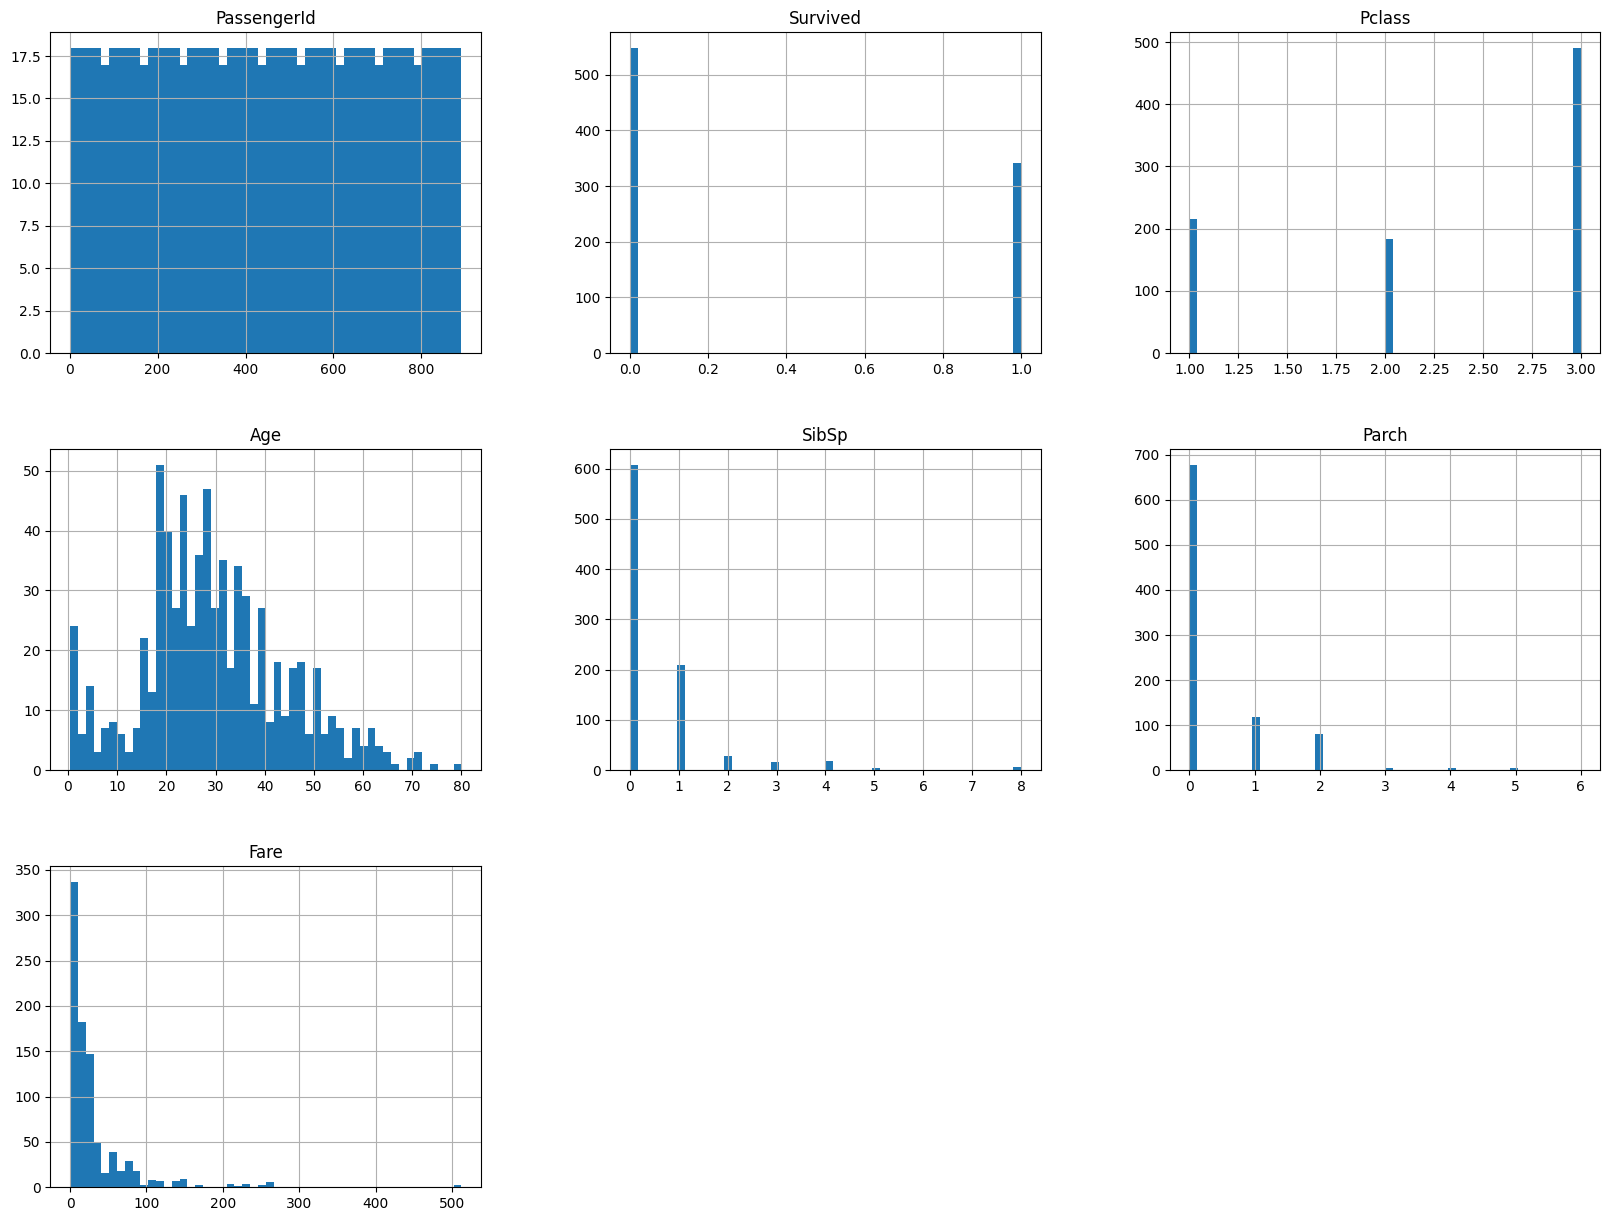

In [45]:
df.hist(bins=50, figsize=(20,15))

### Separação dados em treino e teste

In [49]:
# Particionar dadoos de treino e teste
X = df.drop('Survived', axis=1)
y = df['Survived']
random_state = 42
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

In [120]:
for i in (y_train, y_test):
    print('-'*20, 'Percentage distribution of the target variable', '-'*20, '\n')
    print(i.value_counts(normalize=True),'\n')


-------------------- Percentage distribution of the target variable -------------------- 

Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64 

-------------------- Percentage distribution of the target variable -------------------- 

Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64 



In [144]:
def compare_distribution_bins(X_train, X_test, label, num_bins=10):  
    '''
    Função para comparar a distribuição de uma variável continuas em um conjunto de dados de treino e teste

    Argumentos:
    X_train (pd.DataFrame): DataFrame de treino
    X_test (pd.DataFrame): DataFrame de teste
    label (str): Nome da coluna a ser comparada
    num_bins (int): Número de bins para a discretização

    Retorno:
    Gráfico de histograma comparando a distribuição da variável nos conjuntos de treino e teste
    '''  

    # num_bins = 10 #quantidade de bins
    start = X_train[label].min()
    end = X_train[label].max()
    step = (end-start)/(num_bins-2) #step utiliado nas bins
    bins = [-np.inf]+np.arange(start, end+1, step).tolist()+[np.inf]
    labels = list(range(1,num_bins+1))

    X_train[f'{label}_cat']=pd.cut(X_train[label], bins=bins, labels=labels)
    X_test[f'{label}_cat']=pd.cut(X_test[label], bins=bins, labels=labels)

    # Criação da figura e dos subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # Plotagem do primeiro histograma
    axs[0].hist(X_train[f'{label}_cat'])
    axs[0].set_title(f'Hist Treino {label}')

    # Plotagem do segundo histograma
    axs[1].hist(X_test[f'{label}_cat'])
    axs[1].set_title(f'Hist Teste {label}')

    # Ajuste de layout
    plt.tight_layout()


def compare_distribution_num_cat(X_train, X_test, label):  
    '''
    Função para comparar a distribuição de uma variável categorica 
    que esta em numero no conjunto de dados de treino e teste

    Argumentos:
    X_train (pd.DataFrame): DataFrame de treino
    X_test (pd.DataFrame): DataFrame de teste
    label (str): Nome da coluna a ser comparada

    Retorno:
    Gráfico de histograma comparando a distribuição da variável nos conjuntos de treino e teste
    '''  

    # Criação da figura e dos subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # Plotagem do primeiro histograma
    axs[0].hist(X_train[label])
    axs[0].set_title(f'Hist Treino {label}')

    # Plotagem do segundo histograma
    axs[1].hist(X_test[label])
    axs[1].set_title(f'Hist Teste {label}')

    # Ajuste de layout
    plt.tight_layout()


def compare_distribution_categorical(X_train, X_test, label):  
    '''
    Função para comparar a distribuição de uma variável categórica em um conjunto de dados de treino e teste

    Argumentos:
    X_train (pd.DataFrame): DataFrame de treino
    X_test (pd.DataFrame): DataFrame de teste
    label (str): Nome da coluna a ser comparada

    Retorno:
    Gráfico de barras comparando a distribuição da variável nos conjuntos de treino e teste
    '''  

    # Criação da figura e dos subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # Plotagem do primeiro histograma
    sns.countplot(X_train[label], ax=axs[0])
    axs[0].set_title(f'Countplot Treino {label}')

    # Plotagem do segundo histograma
    sns.countplot(X_test[label], ax=axs[1])
    axs[1].set_title(f'Countplot Teste {label}')

    # Ajuste de layout
    plt.tight_layout()

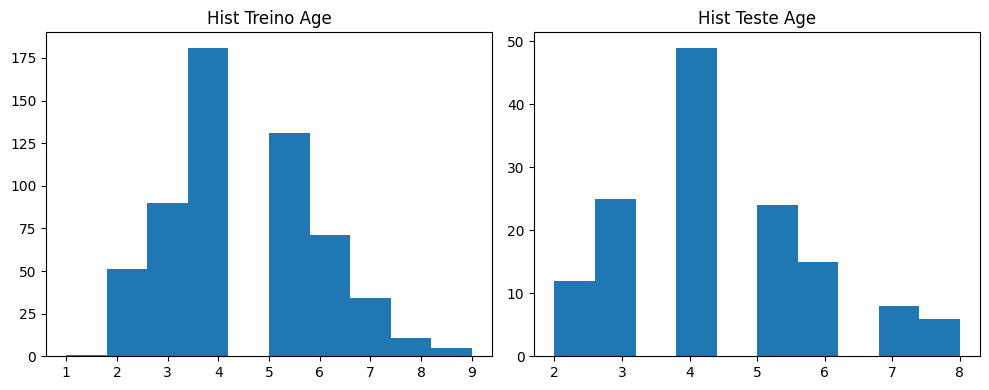

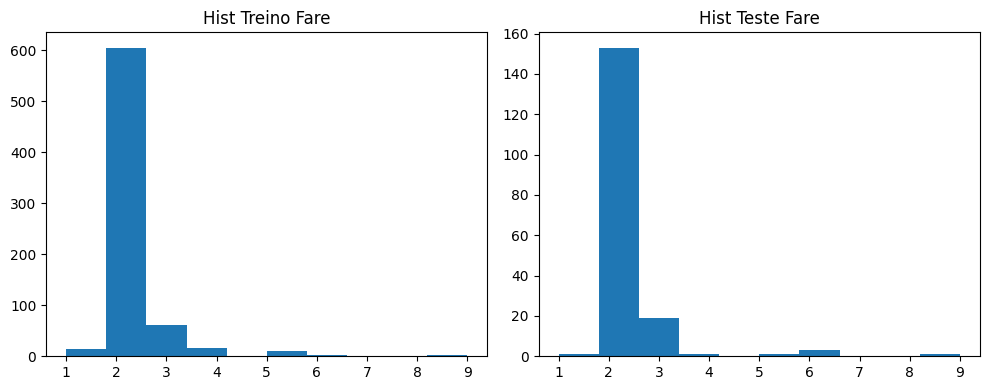

In [145]:
# Comparação de distribuição de variáveis numericas continuas
for i in ['Age','Fare']:
    compare_distribution_bins(X_train, X_test, i, num_bins=10)

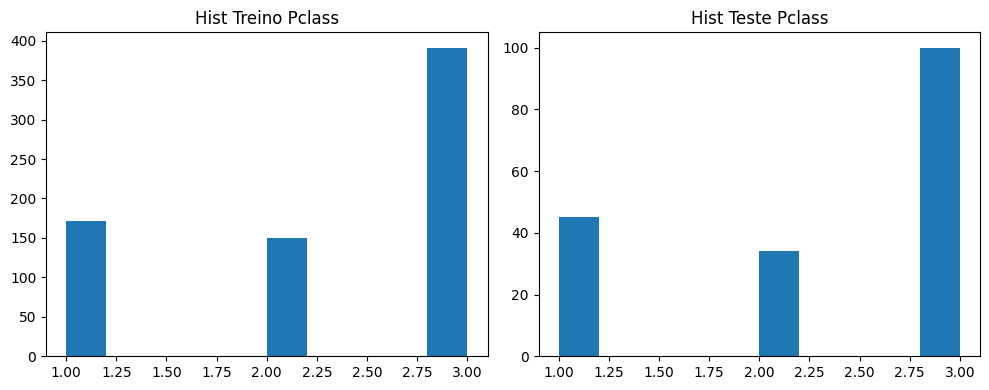

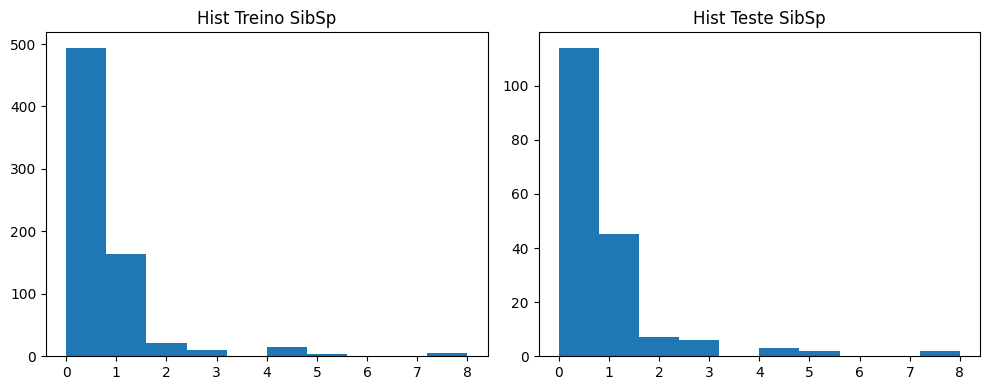

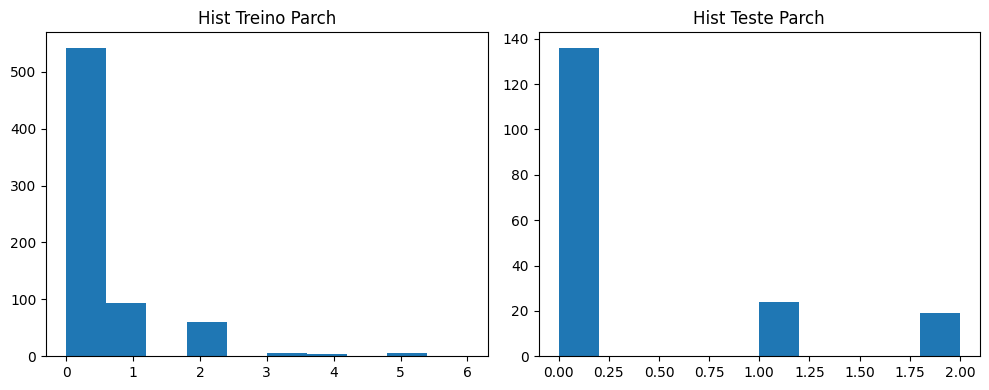

In [147]:
# Comparação de distribuição de variáveis numericas categoricas
for i in [ 'Pclass', 'SibSp', 'Parch']:
    compare_distribution_num_cat(X_train, X_test, i)

/tmp/ipykernel_4135379/3840686057.py:94: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


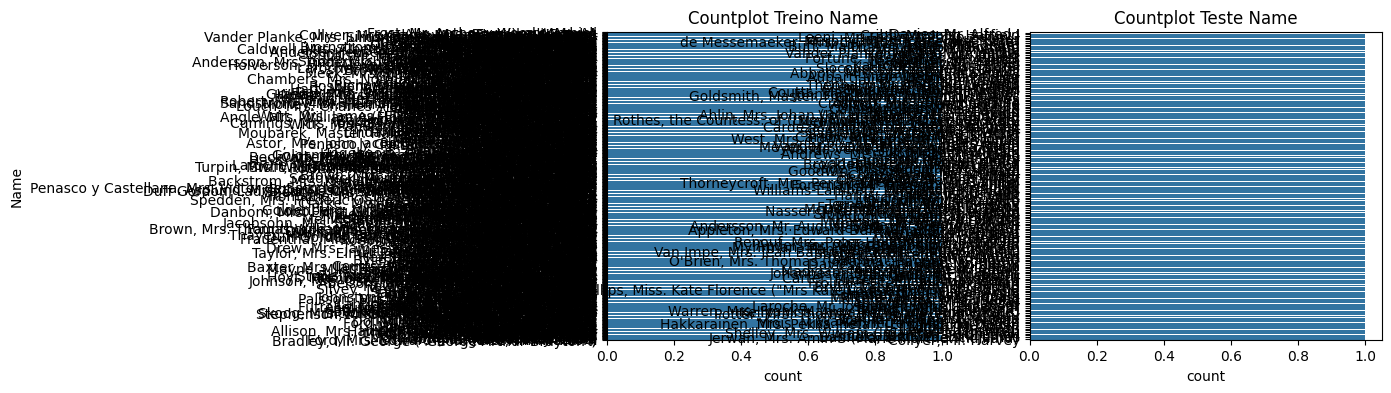

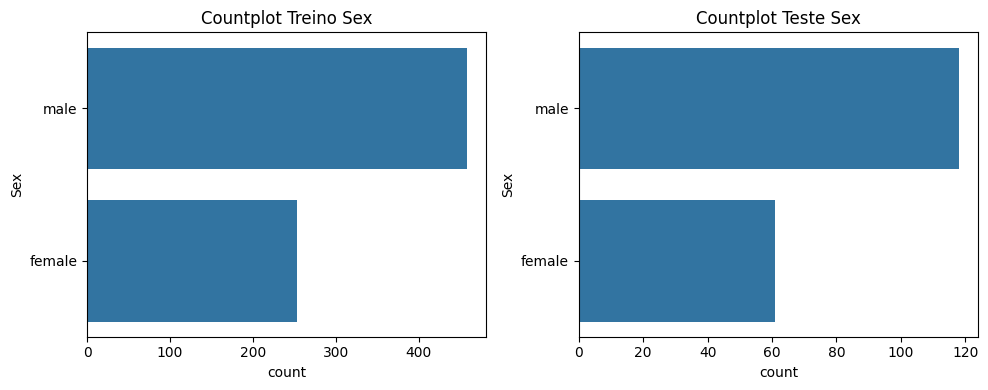

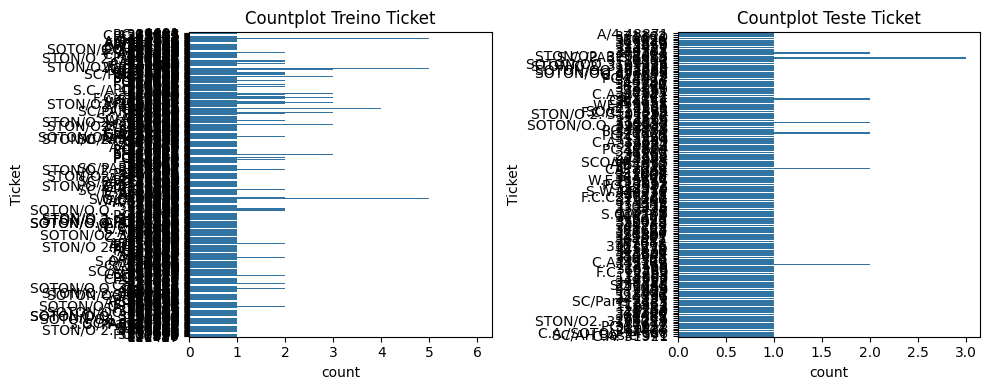

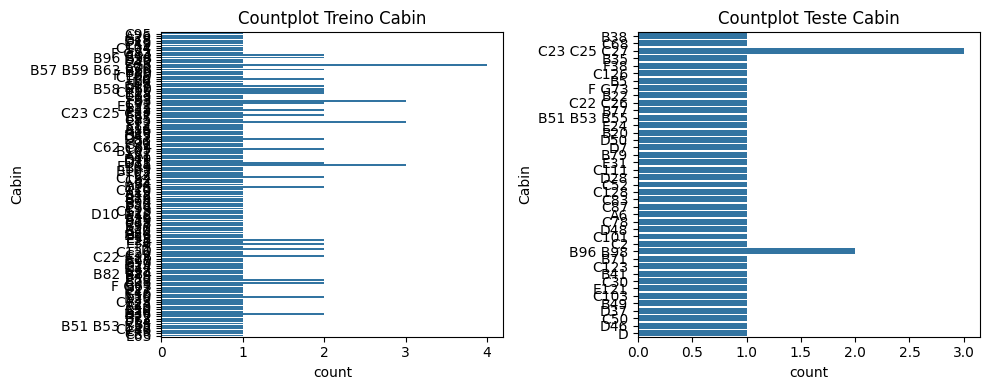

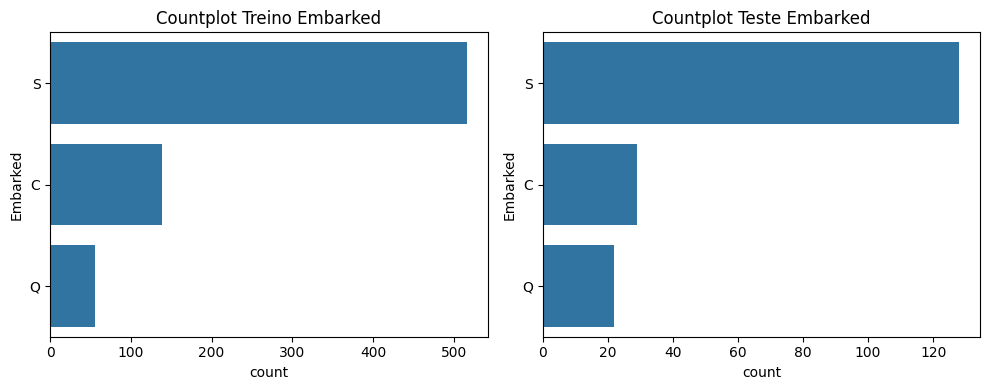

In [148]:
# Comparação de distribuição de variáveis categoricas
for i in object_list:
    compare_distribution_categorical(X_train, X_test, i)

In [149]:
# salvamento do conjunto de dados concatenendo x and y em 2 dataframes treino e teste
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
train.to_csv('dados/train_raw.csv', index=False)
test.to_csv('dados/test_raw.csv', index=False)